In [1]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Part3_data.csv')
data = pd.DataFrame(data).to_numpy()
data

array([[ 9.99999978e-03, -1.04398288e-01, -8.51217270e+00,
        -4.95946980e+00, -3.78552009e-03,  0.00000000e+00],
       [ 1.99999996e-02, -1.11904539e-01, -8.53365517e+00,
        -4.85099936e+00, -3.78551986e-03,  0.00000000e+00],
       [ 2.99999993e-02, -9.26210359e-02, -8.54872227e+00,
        -4.76717186e+00, -3.78552009e-03,  0.00000000e+00],
       ...,
       [ 1.04899998e+01,  1.38200512e-02, -8.60235500e+00,
        -4.83604383e+00, -3.78552009e-03, -4.99999989e-03],
       [ 1.05000000e+01, -6.87990338e-02, -8.62618828e+00,
        -4.85963249e+00, -3.78552009e-03, -4.99999989e-03],
       [ 1.05100002e+01, -1.63372874e-03, -8.61160469e+00,
        -4.83817959e+00, -3.78552009e-03, -4.99999989e-03]])

In [3]:
def model_lin(x, m, c):
    return m * x + c

def norm_res(predicted, observed, errors):
    res = observed-predicted
    return res / errors 

In [13]:
# Here we shall be calculating non-weighted fits for y-error estimation
y_accel = data[500:,2]
force = data[500:,4]
mInit = 0.5
cInit = 0.2

parameters, covariance = opt.curve_fit(model_lin, y_accel, force, p0=[mInit,cInit]) # Simple regression

slope_s = parameters[0] # Simple regression slope

In [14]:
# Weighted regression. Note we use linear model still, as we have already linearized our data to (T^2, I)
parameters, covariance = opt.curve_fit(model_lin, y_accel, force, p0=[mInit,cInit])

slope = parameters[0] # Weighted regression slope
intcp = parameters[1] # Weighted regression intercept
slope_err = np.sqrt(covariance[0][0]) # Weighted regression slope error
intcp_err = np.sqrt(covariance[1][1]) # Weighted regression intercep error

y_model = model_lin(force, slope, intcp) # Y values predicted with our model

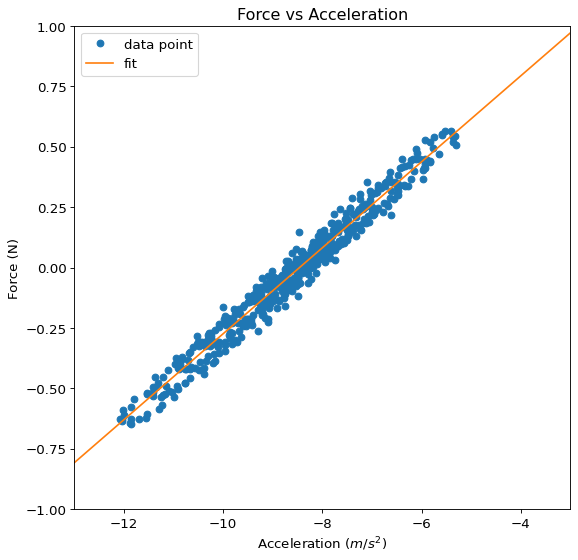

In [16]:
# Force vs Acceleration graph
plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(y_accel, force, fmt='o', capsize = 3, capthick = 1, label="data point")
plt.errorbar(np.linspace(-13,-3), model_lin(np.linspace(-13,-3), slope, intcp), label='fit')

plt.title("Force vs Acceleration")
plt.xlabel('Acceleration ($m/s^2$)')
plt.ylabel('Force (N)')
plt.xlim(-13, -3)
plt.ylim(-1, 1)
plt.legend()
plt.show()